#Neural Network for Sport -(Gittata-Range)


<img src="https://citynews-sportpiacenza.stgy.ovh/~media/horizontal-hi/32988133555468/norberto-fontana-durante-il-lancio-del-giavellotto-a-grosseto-2.jpg" width="1200">

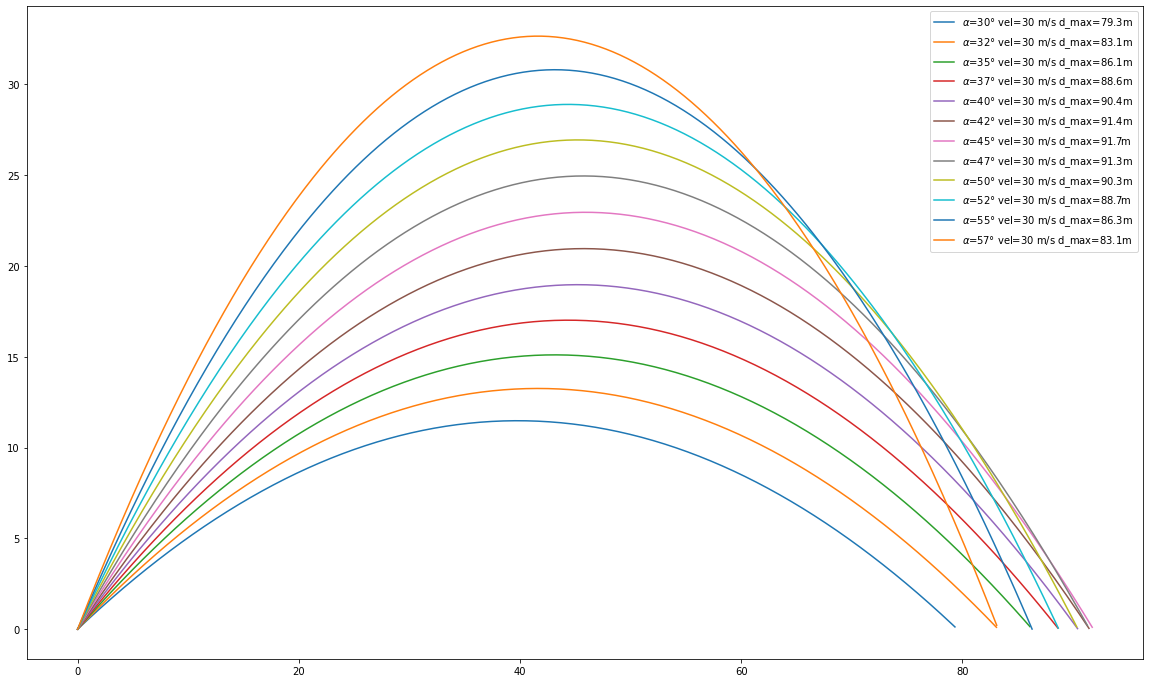

In [4]:
import numpy as np
import matplotlib.pylab as plt
import math as m

#initialize variables
#velocity, gravity
v = 30 # m/s
g = 9.8 # m/s^2

num_trials = m.pi/72 #12
theta = np.arange(m.pi/6, m.pi/3,num_trials )

t = np.linspace(0, 10, num=1000) # Set time as 'continous' parameter.

plt.figure(figsize=(20,12))
for a in theta: # Calculate trajectory for every angle
    x1 = []
    y1 = []
    for k in t:
        x = ((v*k)*np.cos(a)) # get positions at every point in time
        y = ((v*k)*np.sin(a))-((0.5*g)*(k**2))
        x1.append(x)
        y1.append(y)
    ## stop negative part!
    p = [i for i, j in enumerate(y1) if j < 0] # Don't fall through the floor                          
    for i in sorted(p, reverse = True):
        del x1[i]
        del y1[i]
    ### Plot ###    
    angle = a*180/m.pi # conversion in degree
    distance = x1[-1]
    altezza = max(y1)
    plt.plot(x1, y1,
             label=r"$\alpha$"+f"={angle:.0f}° vel={v:.0f} m/s d_max={distance:.1f}m ") #hmax={altezza:.1f}m

plt.legend(loc=1)
plt.show() # And show on one graphic

## Interactive Widgets

In [40]:
import math as m

def plot_trials(v=30, ang_g=30):
    g = 9.8
    t = np.linspace(0, 10, num=1000) # Set time as 'continous' parameter.
    ang = ang_g*m.pi/180 #rad
    theta = np.array([ang]) #array rad

    plt.figure(figsize=(15,8))
    for a in theta: # Calculate trajectory for every angle
        x1 = []
        y1 = []
        for k in t:
            x = ((v*k)*np.cos(a)) # get positions at every point in time
            y = ((v*k)*np.sin(a))-((0.5*g)*(k**2))
            x1.append(x)
            y1.append(y)
        ## stop negative part!
        p = [i for i, j in enumerate(y1) if j < 0] # Don't fall through the floor                          
        for i in sorted(p, reverse = True):
            del x1[i]
            del y1[i]
        ### Plot ###    
        angle = a*180/m.pi # conversion in degree
        distance = x1[-1]
        altezza = max(y1)
        plt.plot(x1, y1,
                label=r"$\alpha$"+f"={angle:.0f}° vel={v:.0f} m/s d_max={distance:.1f}m h_max={altezza:.1f}m ")

    plt.title('Grafico Simulazione Giavellotto')
    plt.xlim(0, distance+50)
    plt.ylim(0, altezza+50)
    plt.ylabel('altezza massima')
    plt.xlabel('distanza massima')
    plt.legend(loc=1)
    plt.show() # And show on one graphic
    print("alpha"+f"={angle:.0f}° speed={v:.0f} m/s d_max={distance:.1f}m h_max={altezza:.1f}m ")

In [41]:
from ipywidgets import interactive

interactive(lambda angle,speed: plot_trials(angle, speed), 
                                angle = (30,70,5),
                                speed = (20,40,1)
                                )

interactive(children=(IntSlider(value=50, description='angle', max=70, min=30, step=5), IntSlider(value=30, de…

## Create Synthetic Data

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

g = 9.81
def generate_data(size=1000):
    velocity = np.random.uniform(5, 35, size)
    alpha = np.random.uniform(20,60, size)
    projectile_range = [np.power(velocity,2)*np.sin(np.deg2rad(2*alpha)) / g]
    y = np.reshape(projectile_range, (size, 1))
    return train_test_split(np.vstack([velocity,alpha]).transpose(),
                            y, 
                            test_size=0.2, 
                            random_state=667
                            )
    
X_train,X_test,y_train,y_test = generate_data()

#Features velocity,alpha
#Target distance

X_train.shape, y_train.shape

((800, 2), (800, 1))

In [17]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=2))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))

model.compile(optimizer='adam', loss="mse", metrics=['mae'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [19]:
checkpoint = ModelCheckpoint(filepath="temp.h5", 
                             verbose=1, 
                             save_best_only=True)

history =model.fit(X_train,y_train,
          epochs=150, 
          batch_size=10,
          validation_data=(X_test,y_test),
          callbacks=[checkpoint]
          )

Epoch 1/150
68/80 [========================>.....] - ETA: 0s - loss: 1704.8300 - mae: 31.2822
Epoch 00001: val_loss improved from inf to 748.30951, saving model to temp.h5
80/80 [==============================] - 1s 4ms/step - loss: 1562.0796 - mae: 30.0001 - val_loss: 748.3095 - val_mae: 22.1223
Epoch 2/150
70/80 [=========================>....] - ETA: 0s - loss: 489.7535 - mae: 18.8603
Epoch 00002: val_loss improved from 748.30951 to 286.95276, saving model to temp.h5
80/80 [==============================] - 0s 2ms/step - loss: 463.4518 - mae: 18.2872 - val_loss: 286.9528 - val_mae: 14.1561
Epoch 3/150
70/80 [=========================>....] - ETA: 0s - loss: 180.8405 - mae: 10.9881
Epoch 00003: val_loss improved from 286.95276 to 152.64960, saving model to temp.h5
80/80 [==============================] - 0s 2ms/step - loss: 172.7162 - mae: 10.7203 - val_loss: 152.6496 - val_mae: 10.2661
Epoch 4/150
78/80 [============================>.] - ETA: 0s - loss: 127.5256 - mae: 8.4983
Epoch 

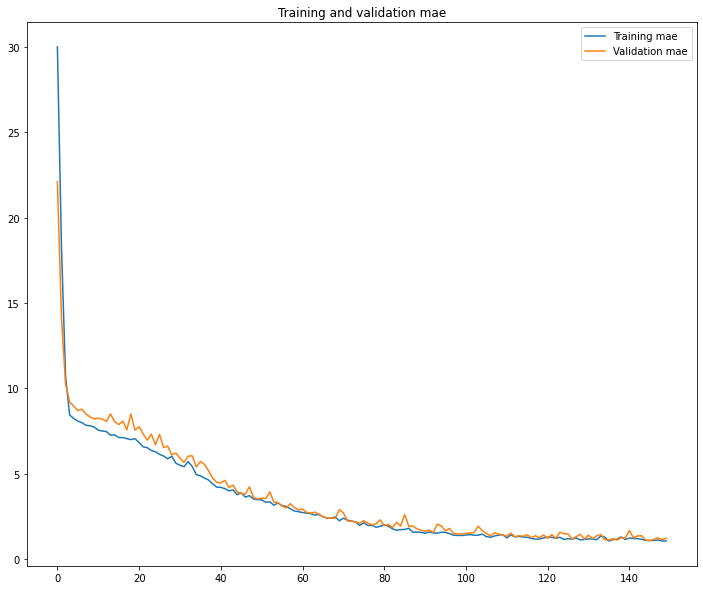

In [21]:
import matplotlib.pyplot as plt
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

plt.figure(figsize=(12,10))
plt.plot(epochs, mae, label='Training mae')
plt.plot(epochs, val_mae, label='Validation mae')
plt.title('Training and validation mae')
plt.legend()

In [22]:
score = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('Score:', score)

7/7 [==============================] - 0s 4ms/step - loss: 2.8506 - mae: 1.2321
Score: [2.850576877593994, 1.2320539951324463]


In [23]:
model.save('final_giavellotto.h5')

In [24]:
model= load_model('final_giavellotto.h5')

In [25]:
## input was no normalized

In [26]:
# feature input velocity + angle in grad
res = model.predict([[30,45]]) ## real--> 91.1m
print("final prediction is " f"{res[0][0]:.2f}m")

final prediction is 89.34m


In [30]:
# feature input velocity + angle in grad
res = model.predict([[30,30]]) ## real--> 79.3m
print("final prediction is " f"{res[0][0]:.2f}m")
print("with the formula we have for input angle 30° and speed of 30 m/s a total rane of 79.3m")
print("final error is "f"{(res[0][0]-79.3)/79.3:.3f}%")

final prediction is 79.67m
with the formula we have for input angle 30° and speed of 30 m/s a total rane of 79.3m
final error is 0.005%
